# Implementation of Perelson et al.

In this implementation we're going to evaluate the properties of a [dynamical model](http://science.sciencemag.org/content/271/5255/1582).

https://www.mit.edu/~kardar/research/seminars/HIV/articles/PerelsonScience1996.pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### (1) Reproduce all four panels from Figure 1 shown in Perelson et al. using eq. 6

Since we are not given any empirical data, use the fitted parameters and the appropriate constants to generate the curves shown on these plots. Remember to account for the time delays for each patient.

#### (i) Implement eq. 6 from the paper as a function.

In [2]:
# Answer

# Patient 104

V0 = 52E3
d = 0.5
c = 3.68
V_I = V0
V_NI = 0


TIME = np.array(np.linspace(0,8,100))

def Vdata(V0, d, c, time = np.array(np.linspace(0,8,100)), delay = 2/24):
    Vplot = []
    V_Iplot = []
    V_NIplot = []
    for t in time:
        V_Ieq = (V0*np.exp(-c*t))
        V_NIeq = (((c*V0)/(c-d))*((c/(c-d))*(np.exp(-d*t)-np.exp(-c*t)) - d*t*np.exp(-c*t)))
        V = V_Ieq + V_NIeq
        Vplot.append(2*V)
        V_Iplot.append(V_Ieq*2)
        V_NIplot.append(V_NIeq*2)
    timeAdj = time + delay
    return Vplot, timeAdj, V_Iplot, V_NIplot

# def V_I(V0, c, t):
#     V_I = (V0*np.exp(-c*t))
#     return V_I

# def V_NI(V0, c, d, t)
#     V_NI = (((c*V0)/(c-d))*((c/(c-d))*(np.exp(-d*t)-np.exp(-c*t)) - d*t*np.exp(-c*t)))
    
 

#### (ii) Make the plot from this function's values over time.

Note that some constants are given in other papers published by this lab. An estimate of k, the viral infectivity rate, can be found in Wein et al. (J. Theor. Biol. 192:81-98) to be $3.43\times10^{-8}$ mL/(virion•day). Note that you will need to solve ordinary differential equations for $T^*$, $V_I$, and $V_{NI}$ to reproduce the data in Figure 1.

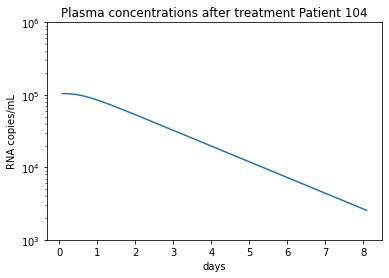

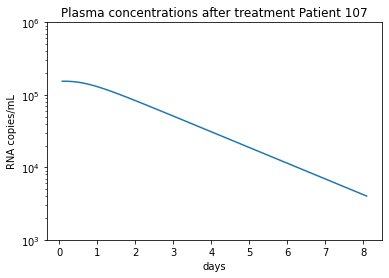

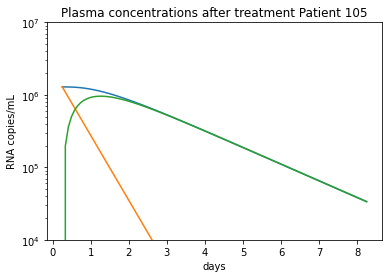

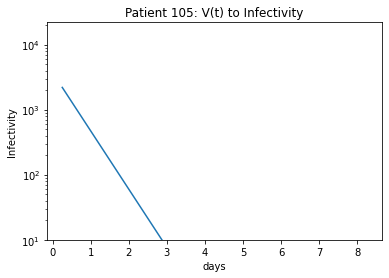

In [3]:
# Answer


Y104, time104,_,_ = Vdata(52E3,0.5,3.68)
Y107, time107,_,_ = Vdata(77E3,0.5,3.09)
Y105, time105, V_I105, V_NI105 = Vdata(643E3,0.53,2.06, delay = 6/24)



plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(time104, Y104)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 104")
plt.show()


plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(time107,Y107)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 107")
plt.show()

plt.semilogy()
plt.ylim(10E3,10E6)
plt.plot(time105,Y105)
plt.plot(time105,V_I105)
plt.plot(time105,V_NI105)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 105")
plt.show()






plt.semilogy()
infectivity =  0.0017107309486780716
V_I105X = np.array(V_I105)*infectivity
plt.plot(time105,V_I105X)
plt.ylim(10,V_I105X[0]*10)
plt.xlabel("days")
plt.ylabel("Infectivity");
plt.title("Patient 105: V(t) to Infectivity")
plt.show()
startingValue = V_I105[0]




### (2) Can the model of virion production before treatment show stable or unstable oscillations?

Justify your answer.

Answer.


$ \textit{1. Differential Equations}$

$$ dT^*/dt = kVT - {\delta} \\ 
 dV/dt = N{\delta}T^* - cV $$
$$\textbf{Jacobian Matrix: }\begin{bmatrix}-{\delta} & kT\\N{\delta} & -c\end{bmatrix}\quad$$


$ \textit{2. Calculating the Eigenvalues} \\ $

$$ Det(A-{\lambda}I) = 0 $$

$$A-{\lambda}I = \begin{bmatrix}-{\delta} -{\lambda} & kT\\ N{\delta} & -c-{\lambda}\end{bmatrix}\quad $$

$$(-{\delta}-{\lambda})(-c-{\lambda})-N{\delta}kT = 0 \\ {\lambda}^2+(c+{\delta}){\lambda}+ (c{\delta} - N{\delta}kT) = 0 \\ {\lambda} = \frac{-(c+{\delta}) {\pm} \sqrt{(c+{\delta})^2-4(c{\delta} - N{\delta}kT)}}{2} $$

Oscillation takes place when $IM(\lambda) {\neq} 0$, so we have to ensure that 

$$(c+{\delta})^2 < 4(c{\delta} - N{\delta}kT)$$



### (3) Reimplement the model relaxing the assumption about T remaining constant by numerically solving the system of ODEs.

#### i. Define a function that takes each parameter as a vector and outputs the time derivative of each species.

In [4]:
##### Answer

# T_star, V_I, V_NI



def deriv(y,t,T0, c, d, N = 53644314.868804656):
    k = 3.43E-8
    T_star = y[0]
    V_I = y[1]
    V_NI = y[2]
    dy = np.empty_like(y)
    
    T = T0 + T_star
    V = V_I + V_NI

    dy[0] =  k*V_I*T-d*T_star
    dy[1] =  -c*V_I
    dy[2] =  N*d*T_star - c*V_NI
    return dy
    
    
    

    

#### ii. Use odeint to solve this system of equations numerically for patient 105.

Hint: For ease later, it may be helpful to make a function here that handles everything but takes in gnu.

In [5]:
# Answer


#Patient 105

k = 3.43E-8
V0 = 643E3
T0 = 11
d = 0.53
T_star0 = k*V0*T0/d
y0 = [T_star0, 643E3, 0]
t = TIME
N = V0*c/(d*T_star0)
solvedVariables105 = odeint(deriv,y0,t, args = (11, 2.06, 0.53, N))
time105N = t + 6/24
V_I105N = solvedVariables105[:,1]
V_NI105N = solvedVariables105[:,2]
Y105N = 2*(V_I105N+V_NI105N)



#### iii. Reproduce the subpanels of Fig. 1 with this updated model. 

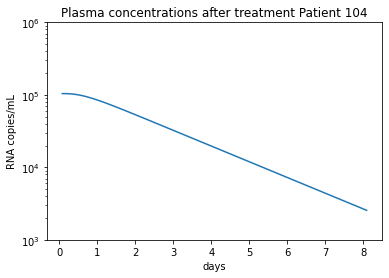

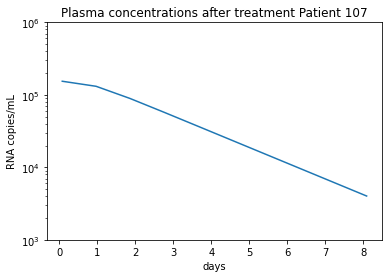

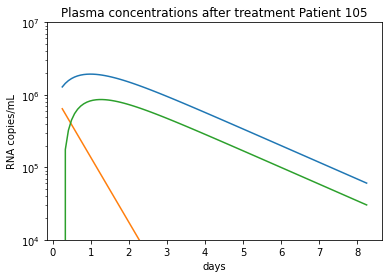

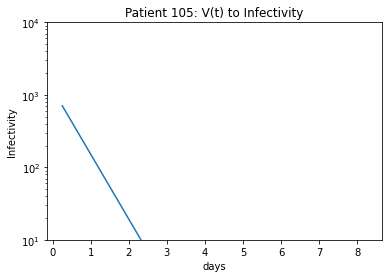

In [6]:
# Answer
#T0, c, d

#FIGURE A1: 104
k = 3.43E-8
V0 = 52E3
T0 = 2
d = 0.5
c = 3.68
delay = 2/24
T_star0 = k*V0*T0/d
TIME = np.linspace(0,8,100)
N = V0*c/(d*T_star0)
y0 = [T_star0, V0, 0]
solvedVariables1 = odeint(deriv,y0,TIME, args = (T0, c, d, 53644314.868804656))
timeAdj = TIME + delay
Y104 = 2*(solvedVariables1[:,1] + solvedVariables1[:,2])

plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(timeAdj, Y104)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 104")
plt.show()

#FIGURE A2: Patient 107
k = 3.43E-8
V0 = 77E3
T0 = 412
d = 0.5
c = 3.09
delay = 2/24
T_star0 = k*V0*T0/d
N = V0*c/(d*T_star0)
y0 = [T_star0, V0, 0]
TIME = np.array(np.linspace(0,8,10))
solvedVariables107 = odeint(deriv,y0,TIME, args = (T0, c, d, N))
time107 = TIME + delay
Y107 = 2*(solvedVariables107[:,1] + solvedVariables107[:,2])
plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(time107,Y107)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 107")
plt.show()




plt.semilogy()
plt.ylim(10E3,10E6)
plt.plot(time105N,Y105N)
plt.plot(time105N,V_I105N)
plt.plot(time105N,V_NI105N)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 105")
plt.show()


#FIGURE B2:

plt.semilogy()
V_I105X = np.array(V_I105N)*1.1E-3
plt.ylim(10,10E3)
plt.plot(time105N,V_I105X)
plt.xlabel("days")
plt.ylabel("Infectivity");
plt.title("Patient 105: V(t) to Infectivity")
plt.show()




#### iv. Are the results the same as in (1)?

Show evidence of your conclusion.

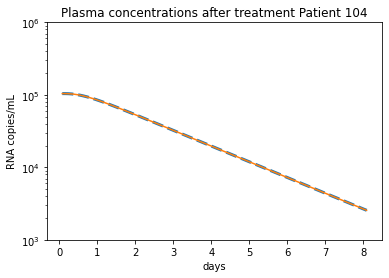

As shown the plots are practically the same as they are on top of each other over the entire range.


In [7]:
# Answer

k = 3.43E-8
V0 = 52E3
T0 = 2
d = 0.5
c = 3.68
delay = 2/24
T_star0 = k*V0*T0/d
TIME = np.linspace(0,8,100)
N = V0*c/(d*T_star0)
y0 = [T_star0, V0, 0]
solvedVariables1 = odeint(deriv,y0,TIME, args = (T0, c, d, 53644314.868804656))
timeAdj = TIME + delay
Y104 = 2*(solvedVariables1[:,1] + solvedVariables1[:,2])

plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(timeAdj, Y104, ls = '--', linewidth = 3)



Y104, time104,_,_ = Vdata(52E3,0.5,3.68)
Y107, time107,_,_ = Vdata(77E3,0.5,3.09)
Y105, time105, V_I105, V_NI105 = Vdata(643E3,0.53,2.06, delay = 6/24)

plt.semilogy()
plt.ylim(10E2,10E5)
plt.plot(time104, Y104)
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.title("Plasma concentrations after treatment Patient 104")
plt.show()

print('As shown the plots are practically the same as they are on top of each other over the entire range.')


### (4) Repeat the work that the authors describe in item 12 of their “References and Notes”.

#### (i) Namely, vary the effectiveness factor of the drug (η=1.0, 0.99, 0.95, and 0.90) and simulate the viral load that would result from the modified differential equations using the parameters c=3.0 days$^{-1}$ and δ=0.5 days$^{-1}$ as described in item 12 and the values of T0, V0, and the time delay provided for patient 105.

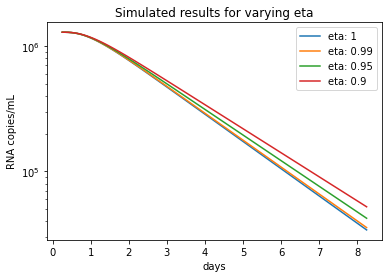

In [8]:
# Answer
#(1 - η)NδT* 



def derivE(y,t,T0, c, d, eta, N = 53644314.868804656):
    k = 3.43E-8
    T_star = y[0]
    V_I = y[1]
    V_NI = y[2]
    dy = np.empty_like(y)
    
    T = T0 + T_star
    V = V_I + V_NI

    dy[0] =  k*V_I*T-d*T_star
    dy[1] =  -c*V_I + (1 - eta)*N*d*T_star
    dy[2] =  eta * N*d*T_star - c*V_NI
    return dy


eta = [1, .99, .95, .9]

#Figure105

V0 = 643E3
T0 = 11
d = 0.5
c = 3.0
T_star0 = k*V0*T0/d
y0 = [T_star0, 643E3, 0]
t = TIME
N = V0*c/(d*T_star0)
for i in range(4):
    plt.semilogy()
    solVar105_4 = odeint(derivE,y0,t, args = (11, c, d, eta[i], N))
    Y105eta = 2*(solVar105_4[:,1] + solVar105_4[:,2])
    time105N = t + 6/24
    plt.plot(time105N,Y105eta, label = "eta: " +str(eta[i]))

plt.legend()
plt.title("Simulated results for varying eta")
plt.xlabel("days")
plt.ylabel("RNA copies/mL");
plt.show()



#### (ii) Then, use the function `scipy.optimize.leastsq` to fit this data to the equation for V(t) given in the paper and find the estimates of c and δ that result. Fit only the portion of the curve after the pharmacokinetic delay. Compare these estimates to the actual values for c and δ and discuss the consequences of an imperfect drug on clearance time estimates.

In [9]:
# Answer
from scipy.optimize import least_squares



# def derivE(y,t,T0, c, d, eta, N = 53644314.868804656):
TIME = np.linspace(0,8,100)
t = TIME
V0 = 643E3
T0 = 11
d = 0.5
c = 3
T_star0 = k*V0*T0/d
y0 = [T_star0, V0, 0]
t = TIME


etaValues = [1,0.99,0.95,0.9]
storage = np.zeros((4,2))
print(storage)

def ls(values, y, t, T0, eta, N):
    predictVal = odeint(derivE, y0, TIME, args = (T0, values[0], values[1], eta, N))
    predictV = (predictVal[:,1] + predictVal[:,2])*2
    return(predictV)
    

def error_func(values, y, t, T0, eta, N, V):

    return(V -ls(values,y,t,T0,eta, N))

for i in range(len(etaValues)):
    values = np.array([3,0.5])
    N = V0*c/(d*T_star0)
    y0 = [T_star0, 643E3, 0]
    V105, time105, V_I105, V_NI105 = Vdata(643E3,0.5,3, delay = 6/24)
    sol = least_squares(error_func, values, args = (y0,t,T0, etaValues[i],N,V105))
    storage[i,:] = sol.x
    print("eta: " + str(eta))
    print("c: " + str(sol.x[0]))
    print("delta: "+ str(sol.x[1]))

print(storage)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
eta: [1, 0.99, 0.95, 0.9]
c: 3.0143446060090184
delta: 0.5003894287154422
eta: [1, 0.99, 0.95, 0.9]
c: 3.036911790725218
delta: 0.5053427549297137
eta: [1, 0.99, 0.95, 0.9]
c: 3.1283074794742896
delta: 0.5254413291054193
eta: [1, 0.99, 0.95, 0.9]
c: 3.2449757506649464
delta: 0.5511811288577515
[[3.01434461 0.50038943]
 [3.03691179 0.50534275]
 [3.12830748 0.52544133]
 [3.24497575 0.55118113]]


#### (iii) Examine the residual plots from your fits to determine whether or not there is a trend in the error associated with fitting these new curves.

Error seems to increase as eta decreases which may make sense as it's not too drastic with little changes but greater deviation from how we would expect the drug to properly work. I think there may be something wrong with my plot as. I would actually expect the curves to be closer together.

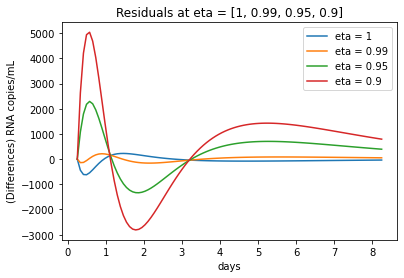

In [10]:
# Answer
# TIME = np.linspace(0,8,100)
# t = TIME
# V0 = 643E3
# T0 = 11
# d = 0.53
# c = 3
# T_star0 = k*V0*T0/d
# y0 = [T_star0, 643E3, 0]
# N = V0*c/(d*T_star0)


etaValues = [1,0.99,0.95,0.9]
for i in range(len(etaValues)):
#     a = odeint(derivE, y0, TIME, args = (T0, storage[i,0], storage[i,1], etaValues[i], N))
#     plt.plot(time105, V105-(a[:,1]+a[:,2]))
    plt.plot(time105, -0.5* error_func(storage[i,:],y0,t,T0, etaValues[i], N, Vdata(643E3,0.5,3, delay = 6/24)[0]), label = "eta = " + str(etaValues[i]))
    plt.title("Residuals at eta = " + str(eta))
    plt.xlabel("days")

    plt.ylabel("(Differences) RNA copies/mL");
    
for i in range(4):
    V = Vdata(643E3,0.5,3, delay = 6/24)[0]
plt.legend()


### (5) To determine the TCID50 one should estimate an infectivity coefficient.

To calculate the infectivity coefficient, estimate the ratio of $V_I(t=0)$ to the value of TCID50(t=0) for patient 105 from Perelson’s Figure 1. This coefficient acts as a conversion factor between the number of virions in the infectious pool, $V_I$, and the TCID50, and is an indicator of the efficiency of the HIV-1 transmission.

In [11]:
# Answer


print("If we compare our original function for figure 1B.2, we'll see that besides the time delay/shift, the other difference is simply in the y-axis start and end. \n In other words the difference as graphed would be different by a several orders of magnititude or roughly 1000 times difference. \nThus, we can expect a conversion factor of close to 1000")
infectivity = 1.1E3 / 643E3
print("infectivity coefficient: " + str(infectivity) + " or " +str(infectivity/2))
print('When looking at the graph from part 1, it closely resembles what we are looking for from the plots in the paper.')





If we compare our original function for figure 1B.2, we'll see that besides the time delay/shift, the other difference is simply in the y-axis start and end. 
 In other words the difference as graphed would be different by a several orders of magnititude or roughly 1000 times difference. 
Thus, we can expect a conversion factor of close to 1000
infectivity coefficient: 0.0017107309486780716 or 0.0008553654743390358
When looking at the graph from part 1, it closely resembles what we are looking for from the plots in the paper.
